In [16]:
# Dependencies to Visualize the model
%matplotlib inline
from IPython.display import Image, SVG
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)

In [17]:
# Filepaths, numpy, and Tensorflow
import os
import numpy as np
import tensorflow as tf


In [18]:
 # Sklearn scaling
from sklearn.preprocessing import MinMaxScaler

**Keras Specific Deendencies**

In [19]:
# Keras
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist

# Loding and Preprocessing our Data

Load the MNIST Handwriting Dataset from Keras

In [20]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("Training Data Info")
print("Training Data Shape:", X_train.shape)
print("Training Data Labels Shape:", y_train.shape)

Training Data Info
Training Data Shape: (60000, 28, 28)
Training Data Labels Shape: (60000,)


**Plot the first digit**

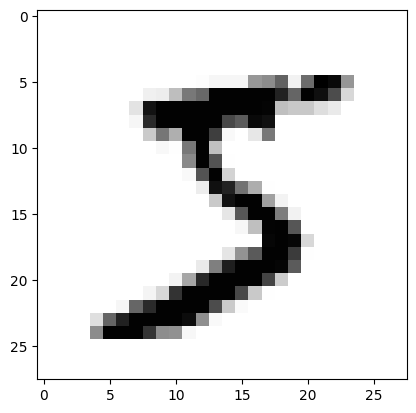

In [21]:
# Plot the first image from the dataset
plt.imshow(X_train[0,:,:], cmap=plt.cm.Greys)

Each Image is a 28*28 Pixel greyscale image with values from 0 to 255

In [22]:
# Our image is an array of pixels ranging from 0 to 255
X_train[0, :, :]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

**For training a model, we want to flatten our data into rows of 1D image arrays**

In [23]:
# We want to flatten our image of 28x28 pixels to a 1D array of 784 pixels
ndims = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], ndims)
X_test = X_test.reshape(X_test.shape[0], ndims)
print("Training Shape:", X_train.shape)
print("Testing Shape:", X_test.shape)

Training Shape: (60000, 784)
Testing Shape: (10000, 784)


# **Scaling and Normalization**


---


We use Sklearn's MinMaxScaler to normalize our data between 0 and 1

In [24]:
# Nomalize our training data to be between 0 and 1
scaler = MinMaxScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
X_train[4]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [26]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

**One-Hot Encoding**

---


We need to one-hot encode our integer labels using the to_categorical helper function

In [27]:
 # Our Training and Testing labels are integer encoded from 0 to 9
y_train[:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [28]:
# We need to convert our target labels (expected values) to categorical data
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
# Original label of `5` is one-hot encoded as `0000010000`
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [30]:
X_train # 60K arrays of 784 numbers
y_train # 60K arrays of 10 categories


array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

**Building my Model**

---


In this example, we are going to build a Deep Multi-Layer Perceptron model with 2 hidden layers.

first step is to create an empty sequential model

In [31]:
# Create an empty sequential model
model = Sequential()

Next, add the first hidden layer

In [33]:
# Add the first layer where the input dimensions are the 784 pixel values
# We can also choose our activation function. `relu` is a common
model.add(Dense(100, activation='relu', input_dim=X_train.shape[1]))

In [34]:
# Add the first layer where the input dimensions are the 784 pixel values
# We can also choose our activation function. `relu` is a common
model.add(Dense(100, activation='relu', input_dim=X_train.shape[1]))

**Our final output layer uses a softmax activation function for logistic regression.**

---


We also need to specify the number of output classes. In this case, the number of digits that we wish to classify.

In [35]:
# Add our final output layer where the number of nodes
# corresponds to the number of y labels
model.add(Dense(num_classes, activation = 'softmax'))

# **Model Summry**

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 89610 (350.04 KB)
Trainable params: 89610 (350.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# **Compile and Train our Model**

---


In [37]:
 # Use categorical crossentropy for categorical data and mean squared error for regression
# Hint: your output layer in this example is using software for logistic regression (categorical)
# If your output layer activation was `linear` then you may want to use `mse` for loss
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# **Finally, we train our model using our training data**

---


 Training consists of updating our weights using our optimizer and loss func

In [38]:
 # Fit (train) the model
model.fit(
    X_train,
    y_train,
    epochs=10,
    shuffle=True,
    verbose=2
)

Epoch 1/10
1875/1875 - 11s - loss: 0.2447 - accuracy: 0.9285 - 11s/epoch - 6ms/step
Epoch 2/10
1875/1875 - 8s - loss: 0.1020 - accuracy: 0.9692 - 8s/epoch - 4ms/step
Epoch 3/10
1875/1875 - 7s - loss: 0.0730 - accuracy: 0.9771 - 7s/epoch - 4ms/step
Epoch 4/10
1875/1875 - 5s - loss: 0.0555 - accuracy: 0.9823 - 5s/epoch - 3ms/step
Epoch 5/10
1875/1875 - 7s - loss: 0.0437 - accuracy: 0.9857 - 7s/epoch - 4ms/step
Epoch 6/10
1875/1875 - 7s - loss: 0.0362 - accuracy: 0.9886 - 7s/epoch - 4ms/step
Epoch 7/10
1875/1875 - 11s - loss: 0.0298 - accuracy: 0.9899 - 11s/epoch - 6ms/step
Epoch 8/10
1875/1875 - 9s - loss: 0.0255 - accuracy: 0.9914 - 9s/epoch - 5ms/step
Epoch 9/10
1875/1875 - 7s - loss: 0.0216 - accuracy: 0.9928 - 7s/epoch - 4ms/step
Epoch 10/10
1875/1875 - 6s - loss: 0.0198 - accuracy: 0.9932 - 6s/epoch - 3ms/step


# **Saving and Loading models**

---



In [41]:
# Save the model
model.save("mnist_trained.h5")

# **Evaluating the Model**

In [42]:
# Evaluate the model using the training data
model_loss, model_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

313/313 - 1s - loss: 0.1187 - accuracy: 0.9737 - 635ms/epoch - 2ms/step
Loss: 0.118709497153759, Accuracy: 0.9736999869346619


# **Making Predictions**

In [43]:
#Grab just one data point to test wiht
test = np.expand_dims(X_train[0], axis=0)
test.shape

(1, 784)

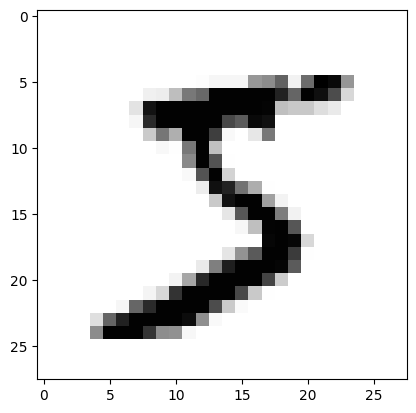

In [45]:
plt.imshow(scaler.inverse_transform(test).reshape(28, 28), cmap=plt.cm.Greys)

In [46]:
 # Make a prediction. The result should be 0000010000000 for a 5
 model.predict(test).round()

1/1 [==============================] - 0s 182ms/step


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [47]:
# Grab just one data point to test with
test = np.expand_dims(X_train[2], axis=0)
test.shape

(1, 784)

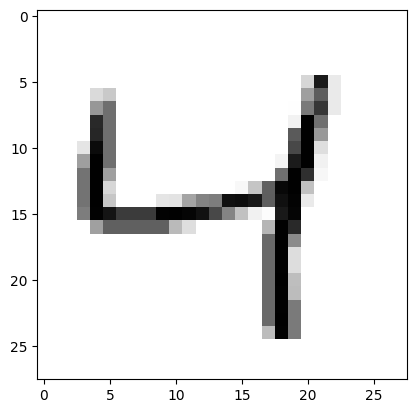

In [48]:
 plt.imshow(scaler.inverse_transform(test).reshape(28, 28), cmap=plt.cm.Greys)

In [49]:
 # Make a prediction. The resulting class should match the digit
print(f"One-Hot-Encoded Prediction: {model.predict(test).round()}")
print(f"Predicted class: {np.argmax(model.predict(test),axis=1)}")

1/1 [==============================] - 0s 41ms/step
One-Hot-Encoded Prediction: [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
1/1 [==============================] - 0s 49ms/step
Predicted class: [4]


# **Import a Custom Image**

In [50]:
filepath = "https://static.bc-edx.com/data/dl-1-2/m23/lessons/1/img/test2.png"

In [51]:
from urllib.request import urlopen
from io import BytesIO
from tensorflow.keras.preprocessing import image
image_size = (28, 28)
with urlopen(filepath) as raw:
    im = image.load_img(BytesIO(raw.read()), target_size=image_size, color_mode="grayscale")
im

In [52]:
 # Convert the image to a numpy array
from tensorflow.keras.preprocessing.image import img_to_array
image = img_to_array(im)
image.shape

(28, 28, 1)

In [53]:
# Scale the image pixels by 255 (or use a scaler from sklearn here)
image /= 255

# Flatten into a 1x28*28 array
img = image.flatten().reshape(-1, 28*28)
img.shape

(1, 784)

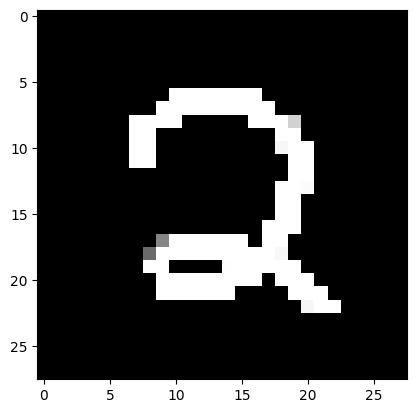

In [54]:
plt.imshow(img.reshape(28, 28), cmap=plt.cm.Greys)

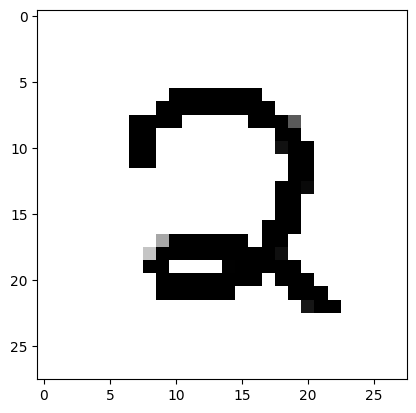

In [55]:
# Invert the pixel values to match the original data
img = 1 - img
plt.imshow(img.reshape(28, 28), cmap=plt.cm.Greys)

In [56]:
 # Make predictions
np.argmax(model.predict(img),axis=1)

1/1 [==============================] - 0s 38ms/step


array([2])